# Doing Covariance Calculations.

In [1]:
import numpy as np 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

Here's the data set we used on NB04 for k-means.

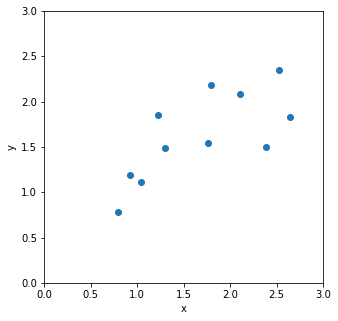

In [2]:
np.random.seed(12345)
x1 = stats.multivariate_normal.rvs(mean=[1,1], cov=[[.15,0],[0,.15]], size=5)
x2 = stats.multivariate_normal.rvs(mean=[2,2], cov=[[.15,0],[0,.15]], size=6)
X = np.concatenate([x1, x2])
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.scatter([x[0] for x in X], [x[1] for x in X])
plt.axis([0, 3, 0, 3])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [3]:
print(np.cov(X)) #this is no good, we want 2x2 not nxn!

print(np.cov(np.transpose(X))) #here we go

[[ 3.50534015e-02 -1.86080859e-03 -2.93478421e-02  9.68246069e-03
   2.44787479e-02 -1.18104665e-01 -2.36263399e-03 -2.39185981e-02
   8.35658117e-02 -1.08064459e-01  5.21314542e-02]
 [-1.86080859e-03  9.87809590e-05  1.55792917e-03 -5.13993087e-04
  -1.29945348e-03  6.26958200e-03  1.25420342e-04  1.26971794e-03
  -4.43608819e-03  5.73659803e-03 -2.76739642e-03]
 [-2.93478421e-02  1.55792917e-03  2.45709632e-02 -8.10646943e-03
  -2.04943999e-02  9.88810474e-02  1.97807363e-03  2.00254244e-02
  -6.99640019e-02  9.04750624e-02 -4.36461405e-02]
 [ 9.68246069e-03 -5.13993087e-04 -8.10646943e-03  2.67449209e-03
   6.76152682e-03 -3.26229046e-02 -6.52607442e-04 -6.60680207e-03
   2.30825726e-02 -2.98495961e-02  1.43997653e-02]
 [ 2.44787479e-02 -1.29945348e-03 -2.04943999e-02  6.76152682e-03
   1.70941784e-02 -8.24757140e-02 -1.64989186e-03 -1.67030105e-02
   5.83562893e-02 -7.54643641e-02  3.64048187e-02]
 [-1.18104665e-01  6.26958200e-03  9.88810474e-02 -3.26229046e-02
  -8.24757140e-02  

In [4]:
#the covariance by hand is...
cov_mat=np.zeros((2,2))
print(cov_mat)
cov_mat[0,0]=np.var(X[:,0], ddof=1)
cov_mat[1,1]=np.var(X[:,1], ddof=1)

print(cov_mat)

#diagonal is easy!

# or we could do these by hand!

mean1=np.mean(X[:,0])
mean2=np.mean(X[:,1])

cov_mat[0,0]=np.sum((X[:,0]-mean1)**2/(len(X)-1))
cov_mat[1,1]=np.sum((X[:,1]-mean2)**2/(len(X)-1))

print(cov_mat)


[[0. 0.]
 [0. 0.]]
[[0.44723032 0.        ]
 [0.         0.23485689]]
[[0.44723032 0.        ]
 [0.         0.23485689]]


In [5]:
#off diagonal is harder, but works the same way as the by hand approach above:
covar12=np.sum((X[:,0]-mean1)*(X[:,1]-mean2)/(len(X)-1))
cov_mat[1,0]=covar12
cov_mat[0,1]=covar12
print(cov_mat)

#chack against: print(np.cov(np.transpose(X))) #here we go

[[0.44723032 0.23227249]
 [0.23227249 0.23485689]]


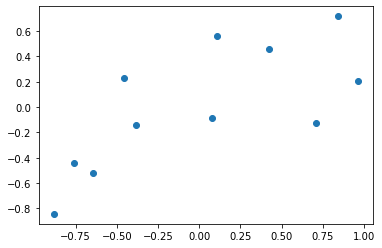

In [6]:
#what changes in the GMM?

#NOTHING MAJOR
#1) include the pmi for each value as a dot product to do *weighted* variance/covariance
#2) no "-1" in the denominator for either variance or covariance, since this is an MLE.

#bonus: outer product is sick

X_new=X.copy()
X_new[:,0]=X_new[:,0]-mean1
X_new[:,1]=X_new[:,1]-mean2
plt.scatter(X_new[:,0],X_new[:,1]) #it's our data recentered...

In [10]:
# the point near the bottom left is extremely low for both directions!
# it contributes a + to the covariance, but it's also a + to BOTH variances.  this is an *outer product*
print(X_new[:])
np.outer(X_new[0,:],X_new[0,:])


[[-0.76086612 -0.4420148 ]
 [-0.88276094 -0.84274218]
 [ 0.07976036 -0.087845  ]
 [-0.64560012 -0.51838894]
 [-0.38374203 -0.14476666]
 [ 0.70849957 -0.12953303]
 [ 0.42492062  0.46114882]
 [ 0.84239925  0.71580385]
 [-0.45681398  0.22847725]
 [ 0.96482754  0.20263392]
 [ 0.10937585  0.55722675]]


array([[0.57891725, 0.33631408],
       [0.33631408, 0.19537708]])

In [8]:
#or all told, we sum and divide to "average" that outer product.
print(np.sum(np.outer(X_new[i,:],X_new[i,:]) for i in range(len(X_new)))/(len(X_new)-1))

# or REALLY all told:
Xmean=[mean1, mean2]
print(np.sum(np.outer(X[i,:]-Xmean,X[i,:]-Xmean) for i in range(len(X)))/(len(X)-1))
#            ^HERE
#where the weight-of-point-i multiplication goes)

[[0.44723032 0.23227249]
 [0.23227249 0.23485689]]
[[0.44723032 0.23227249]
 [0.23227249 0.23485689]]


C:\Users\caleb\AppData\Local\Temp/ipykernel_3192/2507497924.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  print(np.sum(np.outer(X_new[i,:],X_new[i,:]) for i in range(len(X_new)))/(len(X_new)-1))
C:\Users\caleb\AppData\Local\Temp/ipykernel_3192/2507497924.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  print(np.sum(np.outer(X[i,:]-Xmean,X[i,:]-Xmean) for i in range(len(X)))/(len(X)-1))


In [9]:
#of course, we don't really need a list comprehension in numpy...
print(np.matmul(X_new.T,X_new)/(len(X)-1))

#or the MLE form:
print(np.matmul(X_new.T,X_new)/(len(X)))
#here now we'd have to replace one of the instances of "X_new" 
#with "np.inner(X_new, pmi)" for appropriate prob-weights of that component's pmi

[[0.44723032 0.23227249]
 [0.23227249 0.23485689]]
[[0.40657302 0.21115681]
 [0.21115681 0.21350626]]
